In [37]:
print('MODELO SIR')

MODELO SIR


In [38]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [39]:
# Se definen los parámetros iniciales

N = 1000 # población total
I0 = 1 # personas infectadas
R0 = 0 # personan susceptibles
S0 = N - I0 - R0 # personas iniciales
b = 0.2
g = 1./10

In [77]:
# Definición para la evolución temporal

dias_t = 100 # número total de días (stop)
num = 100 # número de puntos 

# Inicializar array

t = np.linspace(0, dias_t, num)

In [78]:
# Definición para la función Y

def Y(y, t, b, g):
    # Vectores variable
    S = y[0]
    I = y[1]
    R = y[2]
    # Vectores derivada
    dS = -b*y[0]*y[1]/N
    dI = b*y[0]*y[1]/N - g*y[1]
    dR = g*y[1]
    return dS, dI, dR

# Creación del vector de condiciones iniciales

y0 = [S0, I0, R0]

In [79]:
# Definición de las soluciones

ret = odeint(Y, y0, t, args=(b, g))
S, I, R = ret.T

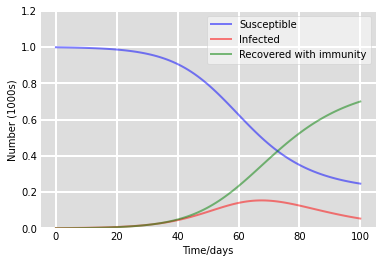

In [80]:
# Graficación

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible') # Variable S vs t
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected') # Variable I vs t
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity') # Variable R vs t

ax.set_xlabel('Time/days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
plt.show()   

In [44]:
print('MODELO SEIR')

MODELO SEIR


In [45]:
# Ya las librerías se encuentran importadas

In [59]:
# Definición de constantes

b = 0.2
g = 1./10
mu = 4.6e-5
nu = 1.8e-4
al = 0.006

# Definición de condiciones iniciales

N = 1000
E0 = 0
I0 = 1
R0 = 0
S0 = N- E0 - I0 - R0

Tamano_grid = 100 # días totales
Step = 100 # número de puntos
t = np.linspace(0, Tamano_grid, Step)

In [64]:
# Definición para la función X

def X(y, t, b, g, mu, nu, al):
    # Vectores variable
    S = y[0]
    E = y[1]
    I = y[2]
    R = y[3]
    # Vectores derivada
    dS = -b*y[0]*y[2] + nu*N - mu*y[0]
    dE = b*y[0]*y[2] - al*y[1] - mu*y[1]
    dI = al*y[1] - g*y[2] - mu*y[2]
    dR = g*y[2] - mu*y[3]
    return dS, dE, dI, dR

# Creación del vector de condiciones iniciales

y0 = S0, E0, I0, R0

In [65]:
# Definición de las soluciones

ret = odeint(X, y0, t, args=(b, g, mu, nu, al))
S, E, I, R = ret.T

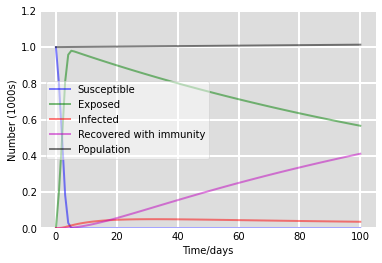

In [67]:
# Graficación

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible') 
ax.plot(t, E/1000, 'g', alpha=0.5, lw=2, label='Exposed') 
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected') 
ax.plot(t, R/1000, 'm', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (S+E+I+R)/1000, 'k', alpha=0.5, lw=2, label='Population')

ax.set_xlabel('Time/days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
plt.show()

In [68]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())            

['builtins', 'builtins', 'numpy', 'matplotlib.pyplot', 'types']